In [9]:
import numpy as np

In [10]:
import pandas as pd
mnist = pd.read_csv("/Users/yangdongjae/Desktop/2021/ExternalActivities/MachineLearning_Study/Document/3Week(MINIST)/dt/mnist_784.csv")

In [11]:
X = mnist.iloc[:,:784]
y = mnist["class"]

In [12]:
from sklearn.model_selection import train_test_split
0.33
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size =0.33, random_state = 42 )

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5 , random_state = 42)

In [14]:
sgd_clf.fit(X_train, y_train)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([np.array(X.iloc[2314])])

array([2])

In [16]:
scores = sgd_clf.decision_function([np.array(X.iloc[2314])])

In [17]:
scores

array([[ -533887.08819379, -1035083.64794186,   383886.01861474,
         -390147.18547082,  -301046.6602235 ,  -539821.04392689,
         -337936.66857893, -1038228.08123597,  -421144.755548  ,
         -765392.10659447]])

In [18]:
np.argmax(scores)

2

In [19]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
sgd_clf.classes_[5]

5

In [21]:
from sklearn.multiclass import OneVsRestClassifier

ovo_clf = OneVsRestClassifier(SGDClassifier(max_iter = 5 , random_state = 42))
ovo_clf.fit(X_train, y_train)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=5,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=42, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

In [22]:
import random as rd

In [23]:
ovo_clf.predict([np.array(X_test.iloc[rd.randint(0,23100)])])

array([5])

In [24]:
len(ovo_clf.estimators_)

10

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

In [26]:
forest_clf.fit(X_train,y_train)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
forest_clf.predict([np.array(X_test.iloc[rd.randint(0,23100)])])

array([9])

In [28]:
forest_clf.predict_proba([np.array(X_test.iloc[rd.randint(0,23100)])])

array([[0. , 0. , 0.1, 0. , 0. , 0.7, 0. , 0. , 0. , 0.2]])

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(sgd_clf, X_train, y_train , cv = 3, scoring = "accuracy")

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.85789204, 0.88031728, 0.8627727 ])

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [34]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90790483, 0.90897461, 0.9083232 ])

In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4501,    2,   20,   11,    6,   34,   32,    5,   23,    2],
       [   2, 5078,   38,   15,    3,   29,    9,    8,   83,    9],
       [  50,   23, 4140,   72,   74,   18,   66,   53,  134,   10],
       [  34,   28,  103, 4164,    3,  183,   25,   45,  100,   73],
       [  14,   28,   26,    3, 4301,    6,   46,   32,   58,  166],
       [  56,   35,   21,  125,   53, 3582,   99,   28,  138,   69],
       [  34,   23,   32,    0,   35,   73, 4334,    6,   45,    0],
       [  21,   24,   55,   23,   36,    5,    5, 4465,   13,  191],
       [  35,  128,   76,  123,   11,  141,   45,   18, 3929,  123],
       [  34,   31,   15,   70,  155,   37,    2,  143,   60, 4110]])

In [39]:
import matplotlib 
import matplotlib.pyplot as plt

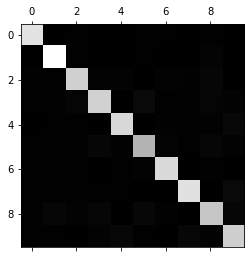

In [40]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [41]:
row_sums = conf_mx.sum(axis= 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums


In [42]:
conf_mx

array([[4501,    2,   20,   11,    6,   34,   32,    5,   23,    2],
       [   2, 5078,   38,   15,    3,   29,    9,    8,   83,    9],
       [  50,   23, 4140,   72,   74,   18,   66,   53,  134,   10],
       [  34,   28,  103, 4164,    3,  183,   25,   45,  100,   73],
       [  14,   28,   26,    3, 4301,    6,   46,   32,   58,  166],
       [  56,   35,   21,  125,   53, 3582,   99,   28,  138,   69],
       [  34,   23,   32,    0,   35,   73, 4334,    6,   45,    0],
       [  21,   24,   55,   23,   36,    5,    5, 4465,   13,  191],
       [  35,  128,   76,  123,   11,  141,   45,   18, 3929,  123],
       [  34,   31,   15,   70,  155,   37,    2,  143,   60, 4110]])

In [43]:
row_sums

array([[4636],
       [5274],
       [4640],
       [4758],
       [4680],
       [4206],
       [4582],
       [4838],
       [4629],
       [4657]])

In [44]:
norm_conf_mx

array([[9.70880069e-01, 4.31406385e-04, 4.31406385e-03, 2.37273512e-03,
        1.29421915e-03, 7.33390854e-03, 6.90250216e-03, 1.07851596e-03,
        4.96117343e-03, 4.31406385e-04],
       [3.79218809e-04, 9.62836557e-01, 7.20515738e-03, 2.84414107e-03,
        5.68828214e-04, 5.49867273e-03, 1.70648464e-03, 1.51687524e-03,
        1.57375806e-02, 1.70648464e-03],
       [1.07758621e-02, 4.95689655e-03, 8.92241379e-01, 1.55172414e-02,
        1.59482759e-02, 3.87931034e-03, 1.42241379e-02, 1.14224138e-02,
        2.88793103e-02, 2.15517241e-03],
       [7.14585960e-03, 5.88482556e-03, 2.16477512e-02, 8.75157629e-01,
        6.30517024e-04, 3.84615385e-02, 5.25430853e-03, 9.45775536e-03,
        2.10172341e-02, 1.53425809e-02],
       [2.99145299e-03, 5.98290598e-03, 5.55555556e-03, 6.41025641e-04,
        9.19017094e-01, 1.28205128e-03, 9.82905983e-03, 6.83760684e-03,
        1.23931624e-02, 3.54700855e-02],
       [1.33143129e-02, 8.32144555e-03, 4.99286733e-03, 2.97194484e-02,
   

In [45]:
np.fill_diagonal(norm_conf_mx, 0)

In [46]:
norm_conf_mx

array([[0.        , 0.00043141, 0.00431406, 0.00237274, 0.00129422,
        0.00733391, 0.0069025 , 0.00107852, 0.00496117, 0.00043141],
       [0.00037922, 0.        , 0.00720516, 0.00284414, 0.00056883,
        0.00549867, 0.00170648, 0.00151688, 0.01573758, 0.00170648],
       [0.01077586, 0.0049569 , 0.        , 0.01551724, 0.01594828,
        0.00387931, 0.01422414, 0.01142241, 0.02887931, 0.00215517],
       [0.00714586, 0.00588483, 0.02164775, 0.        , 0.00063052,
        0.03846154, 0.00525431, 0.00945776, 0.02101723, 0.01534258],
       [0.00299145, 0.00598291, 0.00555556, 0.00064103, 0.        ,
        0.00128205, 0.00982906, 0.00683761, 0.01239316, 0.03547009],
       [0.01331431, 0.00832145, 0.00499287, 0.02971945, 0.01260105,
        0.        , 0.0235378 , 0.00665716, 0.03281027, 0.01640514],
       [0.00742034, 0.00501964, 0.00698385, 0.        , 0.00763859,
        0.01593191, 0.        , 0.00130947, 0.00982104, 0.        ],
       [0.00434064, 0.00496073, 0.0113683

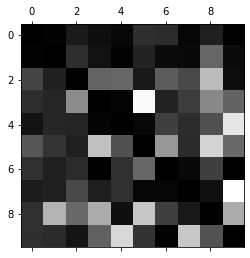

In [47]:
plt.matshow(norm_conf_mx , cmap = plt.cm.gray)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [50]:
y_train

64334    3
4550     2
24098    2
34222    1
36016    2
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: class, Length: 46900, dtype: int64

In [51]:
y_train_large

64334    False
4550     False
24098    False
34222    False
36016    False
         ...  
37194    False
6265     False
54886    False
860      False
15795    False
Name: class, Length: 46900, dtype: bool

In [52]:
y_train_odd

64334     True
4550     False
24098    False
34222     True
36016    False
         ...  
37194    False
6265     False
54886     True
860      False
15795    False
Name: class, Length: 46900, dtype: bool

In [53]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

In [54]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
knn_clf.predict([np.array(X_test.iloc[rd.randint(0,23100)])])

array([[False,  True]])

In [56]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3, n_jobs = -1)

In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.9737972579649253

In [75]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [92]:
X_test_mod

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
46730,38,33,66,48,28,46,27,58,86,29,...,45,74,73,32,13,81,86,32,0,31
48393,79,37,55,74,0,58,16,94,25,92,...,79,94,83,2,29,38,67,93,41,80
41416,47,99,22,93,68,39,55,73,95,30,...,18,66,87,35,15,35,53,50,53,55
34506,37,43,65,11,69,79,59,7,22,70,...,16,68,76,28,45,17,55,96,61,36
43725,51,47,6,42,52,44,5,27,1,45,...,8,61,61,48,27,18,91,96,29,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34382,69,55,55,68,10,90,91,94,33,14,...,31,90,5,55,51,31,36,58,38,43
65822,17,8,56,32,17,45,54,74,90,12,...,61,40,6,28,78,49,28,23,39,63
4116,47,84,37,28,74,42,2,70,23,22,...,67,45,14,87,43,0,60,3,0,30
31281,76,15,5,4,97,5,49,60,24,83,...,34,34,84,55,0,20,57,73,8,50


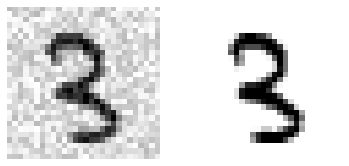

In [95]:
some_index = 5501
plt.subplot(121); plot_digit(np.array(X_test_mod.iloc[2020]))
plt.subplot(122); plot_digit(np.array(y_test_mod.iloc[2020]))
plt.show()

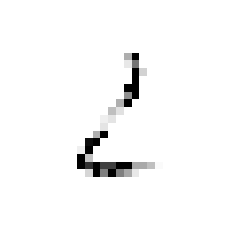

In [84]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(test)
plot_digit(np.array(y_test_mod.iloc[2020]))

In [80]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [83]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")